# Exploratory Data Analysis

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the data

df = pd.read_csv("data/BA_review_cleaned.csv", index_col = 0)

In [3]:
# sanity check

df.head()

,reviews,rating,review date,country,verified user
0,"If I could give a minus rating, I would. Suppo...",1,2023-03-15,United Kingdom,False
1,"Plane was over an hour late leaving, no proble...",2,2023-03-15,United Kingdom,True
2,We were flying World Traveller Plus their Prem...,2,2023-03-14,United Kingdom,False
3,This was literally one of the worst experience...,1,2023-03-13,Ireland,False
4,The usual shambolic unfolding that BA has now ...,1,2023-03-12,United Kingdom,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3490 entries, 0 to 3489
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reviews        3490 non-null   object
 1   rating         3490 non-null   int64 
 2   review date    3490 non-null   object
 3   country        3490 non-null   object
 4   verified user  3490 non-null   bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 139.7+ KB


We should convert the *review date* column to datetime.

In [5]:
# convert the date column to a datetime format

df['review date'] = pd.to_datetime(df['review date'])

Let us add a new column *corpus* containing a lemmatized version of the review.

In [6]:
# for lemmatization of words we will use nltk library
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lem = WordNetLemmatizer()

ENGLISH_STOPWORDS = set(stopwords.words('english'))

# import re for regex
import re

# create an empty list to collect cleaned data corpus
corpus =[]

# loop through each review, remove punctuations, small case it, join it and add it to corpus
for i in df['reviews']:
    i = re.sub('[^a-zA-Z]',' ', i)
    i = i.lower()
    i = i.split()
    i = [lem.lemmatize(j) for j in i if j not in ENGLISH_STOPWORDS]
    i = " ".join(i)
    corpus.append(i)

In [7]:
# sanity check

len(corpus)

3490

In [8]:
# adding the corpus list to the dataframe

df['corpus'] = corpus

In [9]:
# sanity check

df.head()

,reviews,rating,review date,country,verified user,corpus
0,"If I could give a minus rating, I would. Suppo...",1,2023-03-15,United Kingdom,False,could give minus rating would supposed lhr am ...
1,"Plane was over an hour late leaving, no proble...",2,2023-03-15,United Kingdom,True,plane hour late leaving problem happen arrival...
2,We were flying World Traveller Plus their Prem...,2,2023-03-14,United Kingdom,False,flying world traveller plus premium service pr...
3,This was literally one of the worst experience...,1,2023-03-13,Ireland,False,literally one worst experience airport since b...
4,The usual shambolic unfolding that BA has now ...,1,2023-03-12,United Kingdom,True,usual shambolic unfolding ba unfortunately com...


Let us add a customer *satisfaction* column such that:
<ul>
    <li>If rating is greater than 7, the customer satisfaction is high.</li>
    <li>If rating is between 4 and 6, the customer satisfaction is medium.</li>
    <li>If rating is equal to 3 and below below the customer satisfaction is low.</li>
</ul>

In [10]:
for i,v in enumerate(df['rating']):
    if v <= 3:
        df.loc[i,'satisfaction'] = 'low'
    elif v <= 6:
        df.loc[i,'satisfaction'] = 'medium'
    else:
        df.loc[i,'satisfaction'] = 'high'

In [11]:
df.loc[9,'rating'] == 8

True

In [12]:
# sanity check

df.head(15)

,reviews,rating,review date,country,verified user,corpus,satisfaction
0,"If I could give a minus rating, I would. Suppo...",1,2023-03-15,United Kingdom,False,could give minus rating would supposed lhr am ...,low
1,"Plane was over an hour late leaving, no proble...",2,2023-03-15,United Kingdom,True,plane hour late leaving problem happen arrival...,low
2,We were flying World Traveller Plus their Prem...,2,2023-03-14,United Kingdom,False,flying world traveller plus premium service pr...,low
3,This was literally one of the worst experience...,1,2023-03-13,Ireland,False,literally one worst experience airport since b...,low
4,The usual shambolic unfolding that BA has now ...,1,2023-03-12,United Kingdom,True,usual shambolic unfolding ba unfortunately com...,low
5,Lost my case and took 6 weeks to locate it and...,2,2023-03-12,United Kingdom,False,lost case took week locate still replied week ...,low
6,The incoming and outgoing flight was delayed b...,1,2023-03-10,United Kingdom,True,incoming outgoing flight delayed french air tr...,low
7,Back in December my family and I as we were ge...,1,2023-03-10,Australia,True,back december family getting onto plane refuse...,low
8,"As usual the flight is delayed this week, it a...",1,2023-03-10,United Kingdom,True,usual flight delayed week already hour held bu...,low
9,A short BA euro trip and this is where BA exce...,8,2023-03-09,United Kingdom,True,short ba euro trip ba excel clean aircraft goo...,high


## Ratings 

Lets look at the ratings and its distribution among the British Airways customers.

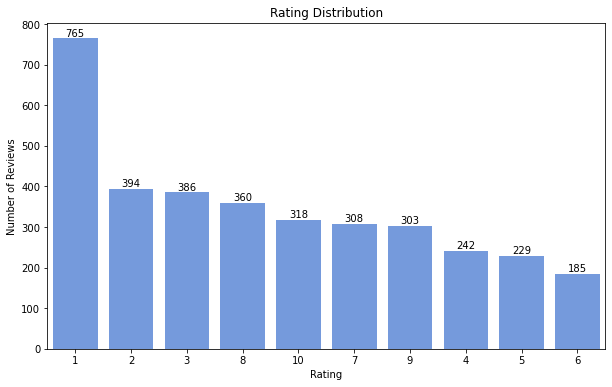

In [13]:
plt.figure(figsize = (10,6))
ax = sns.barplot(x = df['rating'].value_counts().index,
            y = df['rating'].value_counts().values,
            order = df['rating'].value_counts().index,
            color = 'cornflowerblue')
plt.bar_label(ax.containers[0])
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Rating Distribution')
plt.show()

<ul>
    <li>We see nearly 1/5th of British airways customer have given the airline the lowest rating.</li>
    <li>A lot of dissatisfied customers leave reviews.</li>
    <li>Few customers leave reviews when they have a neutral opinion about the airlines.</li>
</ul>

Lets check what is the overall average rating given by the customers.

In [14]:
df['rating'].mean()

4.835816618911175

So the overall rating is **5**, which is average.

Lets look at the rating distribution percentage-wise.

In [15]:
rating = df['rating'].value_counts().index.tolist()
count = df['rating'].value_counts().values.tolist()
percentage = ((df['rating'].value_counts().values/df['rating'].value_counts().values.sum())*100).tolist()

satisfaction = []
for i in rating:
    if i >= 1 and i <= 3:
        satisfaction.append('low')
    elif i >= 4 and i <= 6:
        satisfaction.append('medium')
    else:
        satisfaction.append('high')
        
df_rating = pd.DataFrame({'rating':rating,
                          'count':count,
                          'percentage':percentage,
                          'satisfaction':satisfaction}).sort_values(by = 'rating')   

In [16]:
df_rating

,rating,count,percentage,satisfaction
0,1,765,21.919771,low
1,2,394,11.289398,low
2,3,386,11.060172,low
7,4,242,6.934097,medium
8,5,229,6.561605,medium
9,6,185,5.300860,medium
5,7,308,8.825215,high
3,8,360,10.315186,high
6,9,303,8.681948,high
4,10,318,9.111748,high


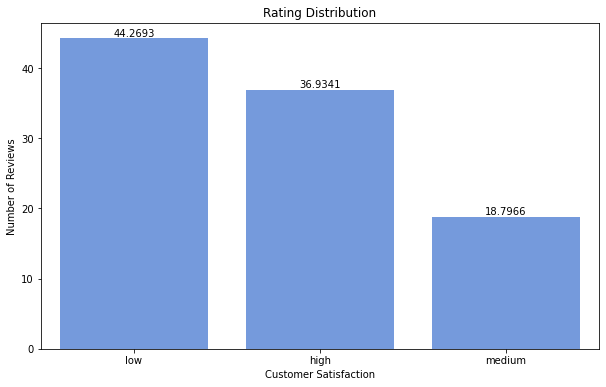

In [17]:
plt.figure(figsize = (10,6))
ax = sns.barplot(x = df_rating.groupby(['satisfaction']).sum().index, 
                 y = df_rating.groupby(['satisfaction']).sum()['percentage'].values,
                 order = ['low', 'high', 'medium'], 
                 color = 'cornflowerblue')
plt.bar_label(ax.containers[0])
plt.xlabel('Customer Satisfaction')
plt.ylabel('Number of Reviews')
plt.title('Rating Distribution')
plt.show()

<ul>
    <li>Nearly 44% of customers have low satisfaction.</li>
    <li>Few customers leave reviews when they have a neutral opinion about the airlines.</li>
    <li>Number ofcustomers leaving high satisfaction reviews is half of customers leaving low satisfaction.</li>
</ul>

Lets check customers from which country leave most reviews.

In [18]:
# Total number of countries in the review list

print(f"There are {len(df['country'].unique())} unique countries in the dataset.")

There are 69 unique countries in the dataset.


In [19]:
df_country_review = pd.DataFrame(df['country'].value_counts()).reset_index()

df_country_review.rename(columns={'index':'country','country':'total reviews'}, inplace = True)

df_country_review

,country,total reviews
0,United Kingdom,2224
1,United States,363
2,Australia,150
3,Canada,108
4,Germany,59
...,...,...
64,Cayman Islands,1
65,Jordan,1
66,Vietnam,1
67,Saint Kitts and Nevis,1


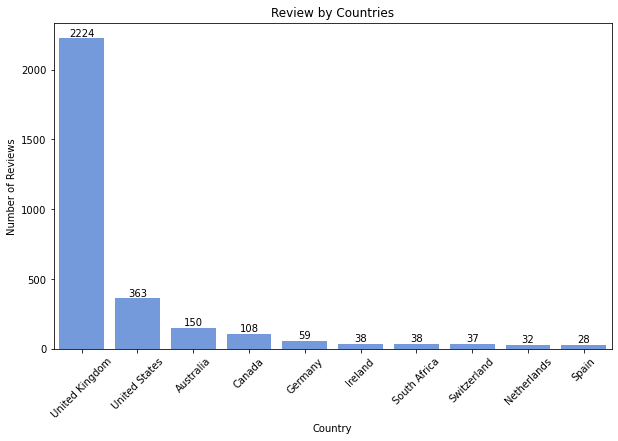

In [20]:
plt.figure(figsize = (10,6))
ax = sns.barplot(x = df_country_review['country'].head(10),
                 y = df_country_review['total reviews'].head(10),
                 color = 'cornflowerblue')
plt.bar_label(ax.containers[0])
plt.xlabel('Country')
plt.xticks(rotation = 45)
plt.ylabel('Number of Reviews')
plt.title('Review by Countries')
plt.show()

Which countries gave the highest average ratings and which gave the lowest average ratings.

In [21]:
df_country_rating = pd.DataFrame(df.groupby('country').mean()['rating'].sort_values(ascending=False)).reset_index()

df_country_rating.rename(columns={'rating':'average rating'}, inplace = True)

df_country_rating

,country,average rating
0,Barbados,10.0
1,Costa Rica,9.0
2,Jordan,8.0
3,Ukraine,8.0
4,Panama,8.0
...,...,...
64,Dominican Republic,2.0
65,Hungary,2.0
66,Nigeria,1.5
67,Bermuda,1.5


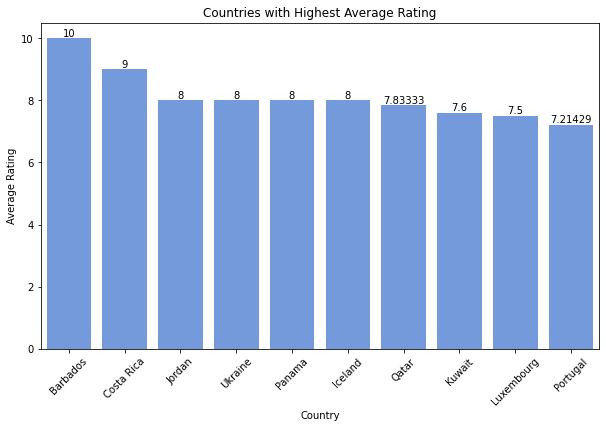

In [22]:
plt.figure(figsize = (10,6))
ax = sns.barplot(x = df_country_rating['country'].head(10),
                 y = df_country_rating['average rating'].head(10),
                 color = 'cornflowerblue')
plt.bar_label(ax.containers[0])
plt.xlabel('Country')
plt.xticks(rotation = 45)
plt.ylabel('Average Rating')
plt.title('Countries with Highest Average Rating')
plt.show()

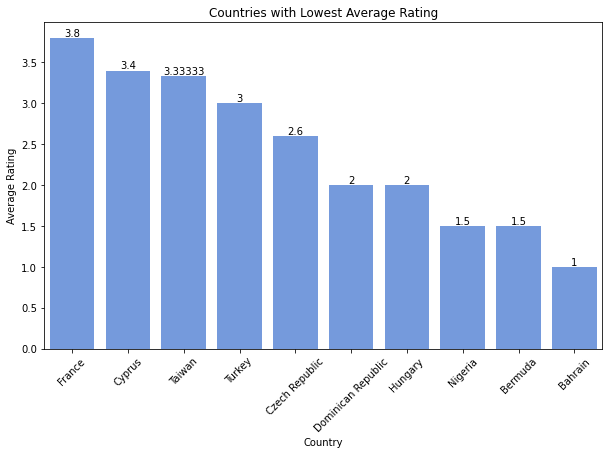

In [23]:
plt.figure(figsize = (10,6))
ax = sns.barplot(x = df_country_rating['country'].tail(10),
                 y = df_country_rating['average rating'].tail(10),
                 color = 'cornflowerblue')
plt.bar_label(ax.containers[0])
plt.xlabel('Country')
plt.xticks(rotation = 45)
plt.ylabel('Average Rating')
plt.title('Countries with Lowest Average Rating')
plt.show()

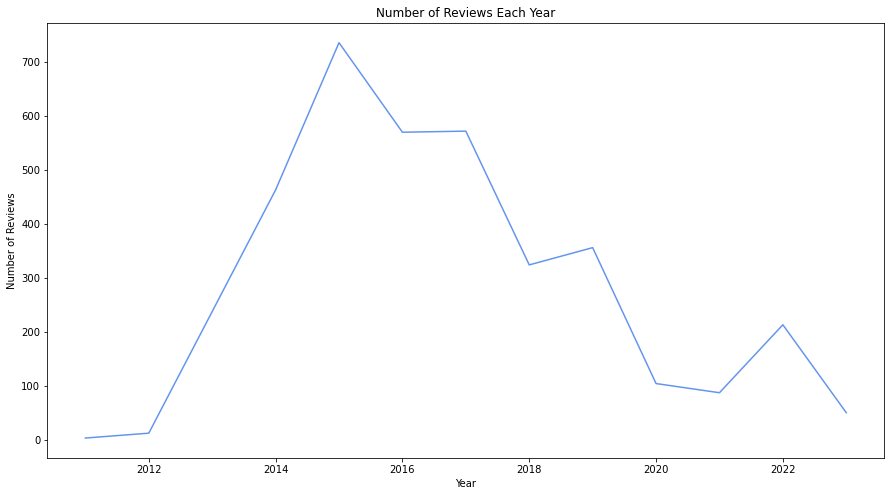

In [24]:
x_data = df.groupby([(df['review date'].dt.year)]).count().index
y_data = df.groupby([(df['review date'].dt.year)]).count()['reviews'].values

plt.figure(figsize = (15,8))
sns.lineplot(x = x_data,
                 y = y_data,
                 color = 'cornflowerblue')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews Each Year')
plt.show()

We can see that during the 2020 and 2021 years the number of reviews reduced drastically because of the pandemic.

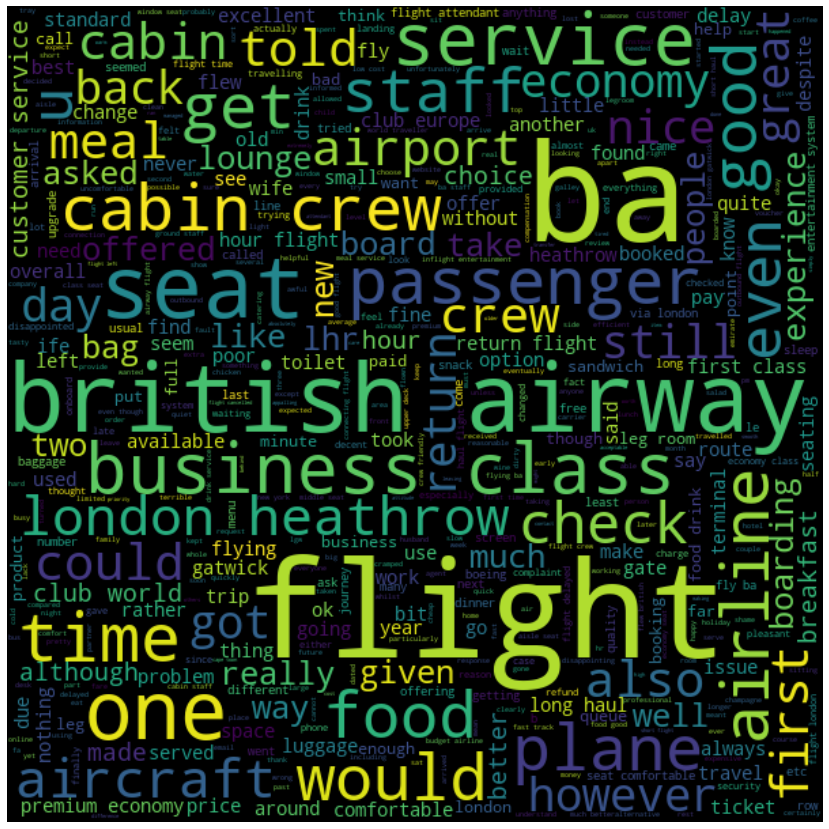

In [25]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Start with one review:
reviews = " ".join(df['corpus'])
plt.figure(figsize=(15,15))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=ENGLISH_STOPWORDS).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Many words in this wordcloud are there because it is a collection of reviews of an airline. Words like 'flight', 'plane', 'airline' etc. are bound to be present in the corpus and tell very little about the actual experience. We can add such words in the stopword set so that they are blocked.

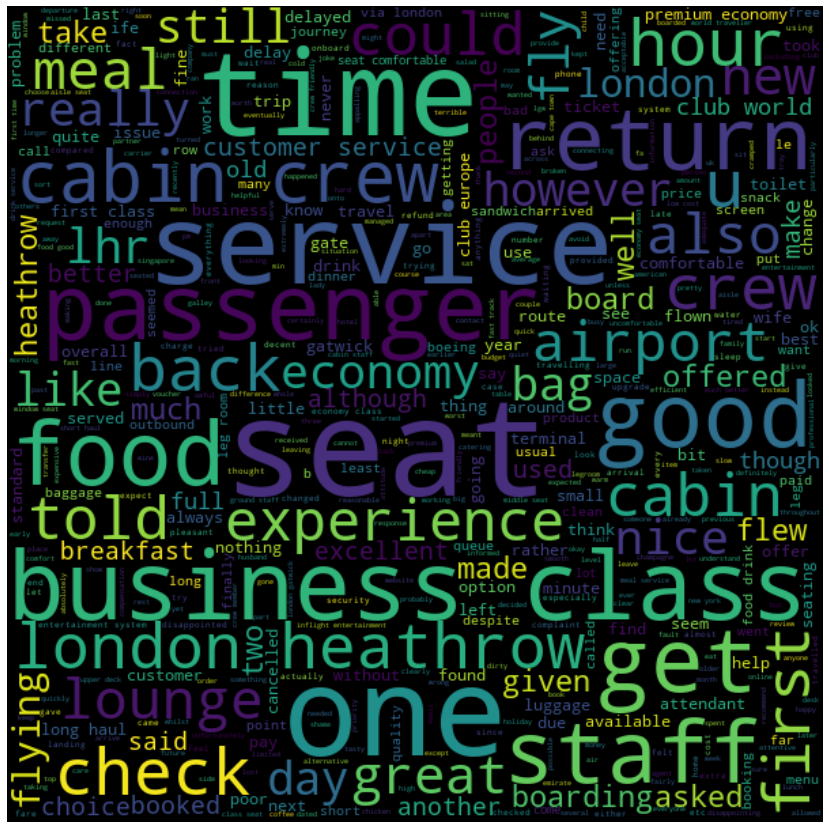

In [26]:
ENGLISH_STOPWORDS.update(['flight', 'ba', 'british', 'airway', 'plane', 'would', 'airline', 'got', 'even', 'way', 'aircraft'])

plt.figure(figsize=(15,15))
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=ENGLISH_STOPWORDS).generate(reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Lets see the wordcloud of reviews with high satisfaction

In [27]:
review_high = " ".join(df[df['satisfaction'] == 'high']['corpus'])
review_medium = " ".join(df[df['satisfaction'] == 'medium']['corpus'])
review_low = " ".join(df[df['satisfaction'] == 'low']['corpus'])

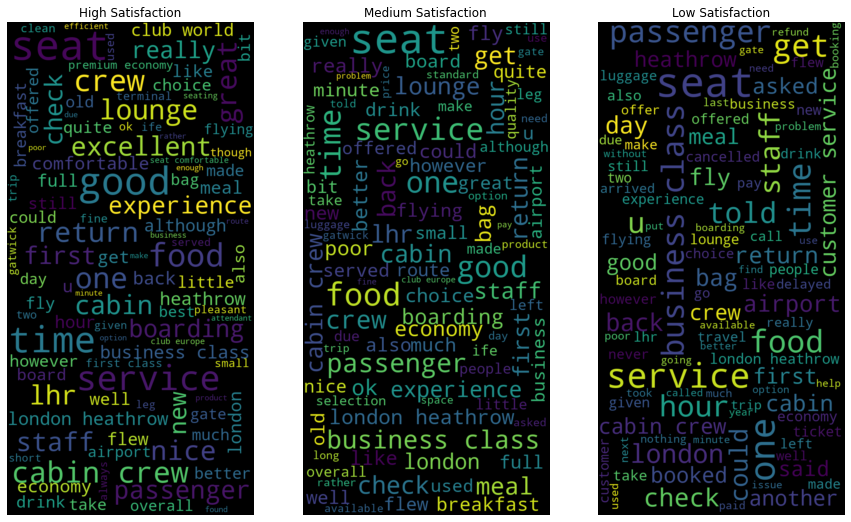

In [28]:
plt.figure(figsize=(15,15))
# plt.subplot(1,3)

plt.subplot(1,3,1)
wc1 = WordCloud(height=1200,width=600,max_font_size=100, max_words=100, stopwords=ENGLISH_STOPWORDS).generate(review_high)
plt.imshow(wc1, interpolation='bilinear')
plt.axis("off")
plt.title('High Satisfaction')

plt.subplot(1,3,2)
wc2 = WordCloud(height=1200,width=600,max_font_size=100, max_words=100, stopwords=ENGLISH_STOPWORDS).generate(review_medium)
plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")
plt.title('Medium Satisfaction')

plt.subplot(1,3,3)
wc3 = WordCloud(height=1200,width=600,max_font_size=100, max_words=100, stopwords=ENGLISH_STOPWORDS).generate(review_low)
plt.imshow(wc3, interpolation='bilinear')
plt.axis("off")
plt.title('Low Satisfaction')

plt.show()

## Word Frquency

In [30]:
from nltk import ngrams
from nltk.probability import FreqDist

words = reviews.split(" ")

checked_words = [i for i in words if i not in ENGLISH_STOPWORDS]

word_freq = FreqDist(checked_words).most_common(25)

# create a dataframe of these word frequencies
df_word_freq = pd.Series(dict(word_freq))

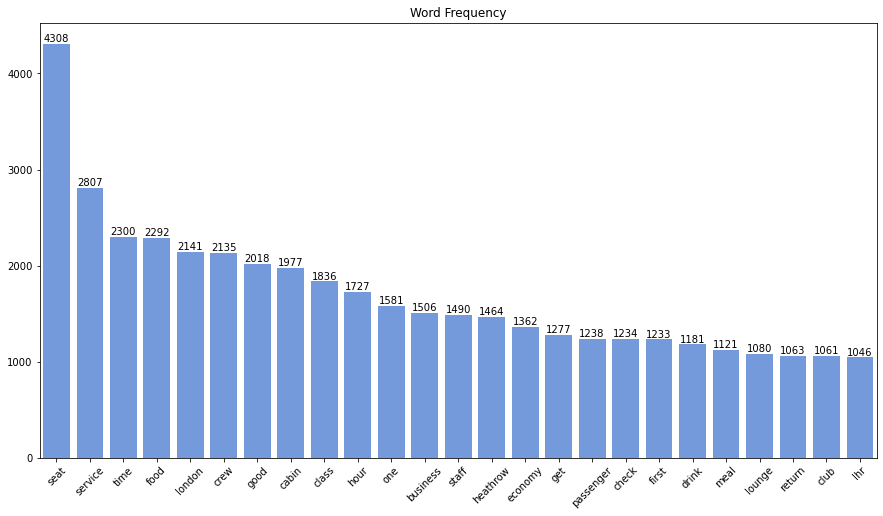

In [31]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x = df_word_freq.index, 
                 y = df_word_freq.values, 
                 color = 'cornflowerblue')
plt.bar_label(ax.containers[0])
plt.xticks(rotation = 45)
plt.title("Word Frequency")
plt.show()

## Word Frequency with N-gram

<AxesSubplot:>

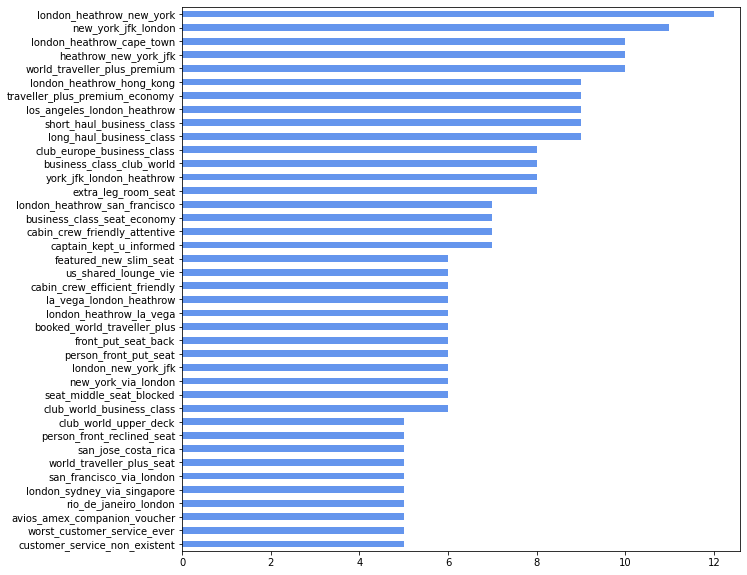

In [32]:
def get_freq_dist(word_list, number_of_words):    
    # Generate ngrams
    ngram = ngrams(word_list, number_of_words)

    # Creating FreqDist
    ngram_freq = FreqDist(ngram).most_common(40)

    # Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_freq, key=lambda item:item[1])}

    # Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_freq, key=lambda item:item[1])}

    # Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh", color = 'cornflowerblue')
    
    return ax


get_freq_dist(checked_words,4)

In the above visualization we see that there are positive terms like 'cabin_crew_friendly_attentive', 'captain_kept_u_informed', 'cabin_crew_efficient_friendly'.

There are alson negative terms like 'worst_customer_service_ever', 'customer_serivce_non_existent'.

Lets see these word frequency Ngrams split by customer satifaction to understand what are the common ngrams for each level of customer satisfaction.

<AxesSubplot:>

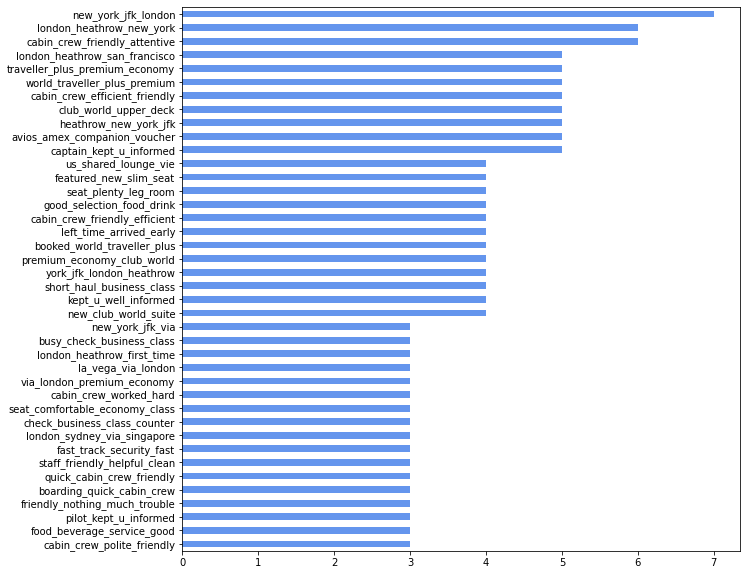

In [33]:
words_high = review_high.split(" ")

checked_words_high = [i for i in words_high if i not in ENGLISH_STOPWORDS]

get_freq_dist(checked_words_high, 4)

<AxesSubplot:>

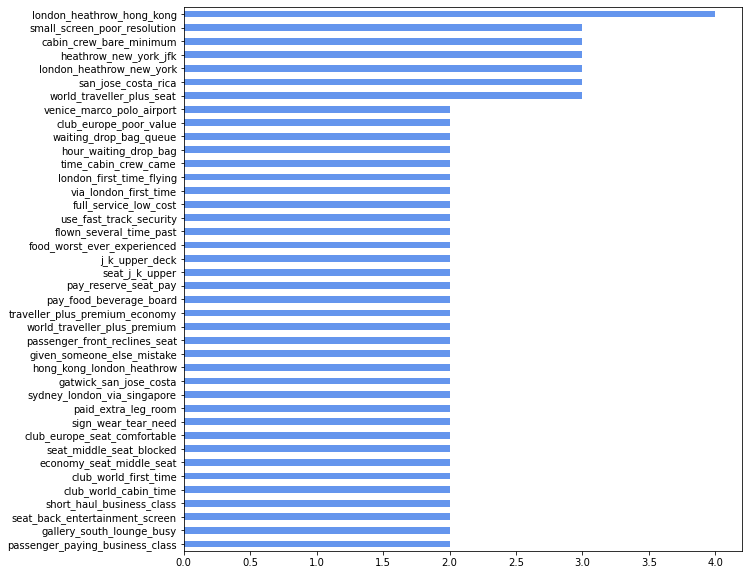

In [34]:
words_medium = review_medium.split(" ")

checked_words_medium = [i for i in words_medium if i not in ENGLISH_STOPWORDS]

get_freq_dist(checked_words_medium, 4)

<AxesSubplot:>

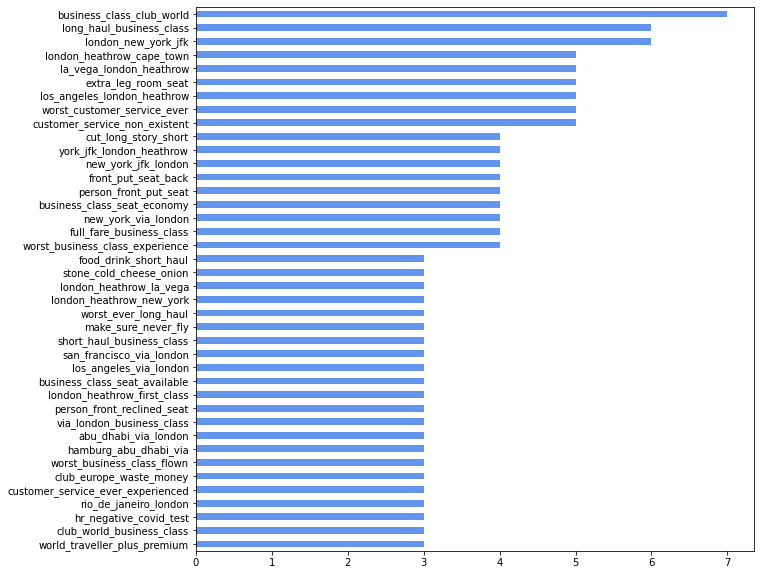

In [35]:
words_low = review_low.split(" ")

checked_words_low = [i for i in words_low if i not in ENGLISH_STOPWORDS]

get_freq_dist(checked_words_low, 4)

## Sentiment Analysis

In [36]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [37]:
vader = SentimentIntensityAnalyzer()

df['label'] = 0

for i in range(len(df['corpus'])):
    score = vader.polarity_scores(df['corpus'][i])['compound']
    if score > 0.2:
        df['label'][i] = 1
    elif score < -0.2:
        df['label'][i] = -1
    else:
        df['label'][i] = 0

C:\Users\prana\AppData\Local\Temp\ipykernel_12640\1126362425.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][i] = -1
C:\Users\prana\AppData\Local\Temp\ipykernel_12640\1126362425.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][i] = 0
C:\Users\prana\AppData\Local\Temp\ipykernel_12640\1126362425.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][i] = 1


In [38]:
df['label'].value_counts()

 1    2287
-1     975
 0     228
Name: label, dtype: int64

Looking at this distribution one might say that the review for British Airways is positive, however, we saw that this is not the case and that the overall satisfaction score is 5/10, which is neutral.

However, such a score could be the reason that vader is not capable of understanding the sarcasm. Positive words used in centain connotations and structure could actually mean a negative thing which the vader sentiment analyzer is not able to pick.

## Topic Modelling with LDA

In [39]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
# vectorize the corpus
# instantiate
count_vect = CountVectorizer(stop_words=ENGLISH_STOPWORDS)

# fit
count_vect.fit(df['corpus'])

# transformed
corpus_transformed = count_vect.transform(df['corpus'])

In [41]:
# instantiate
lda = LatentDirichletAllocation(n_components = 8, random_state = 1, max_iter = 20)

#fit
lda.fit(corpus_transformed)

LatentDirichletAllocation(max_iter=20, n_components=8, random_state=1)

In [42]:
topic_dict = {}

f_names = count_vect.get_feature_names()

# loop through model components to get topics
for topic_idx, topic in enumerate(lda.components_):
    topic_dict[f"Topic {topic_idx} words"] = [f'{f_names[i]}' for i in topic.argsort()[:-11:-1]]
    topic_dict[f"Topic {topic_idx} weights"] = [f'{topic[i]:.2f}' for i in topic.argsort()[:-11:-1]]   
    
df_topic = pd.DataFrame(topic_dict)

C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [43]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights
0,seat,762.50,class,1191.11,hour,712.73,lisbon,34.03,food,524.81,seat,781.99,good,1521.03,seat,610.84
1,service,588.63,business,1005.22,told,406.79,bus,18.61,meal,506.76,london,191.48,seat,1231.93,customer,608.46
2,time,516.19,seat,589.90,staff,406.46,child,16.09,economy,480.76,long,191.32,crew,1191.44,service,578.86
3,food,449.12,first,258.96,london,392.53,athens,15.74,cabin,388.30,food,190.18,food,1013.26,london,398.69
4,check,418.56,club,238.36,bag,379.20,infant,13.83,crew,386.64,cabin,180.49,service,995.23,time,338.87
5,drink,413.18,lounge,196.18,time,373.37,senior,13.75,service,357.83,haul,177.44,cabin,942.64,get,337.10
6,boarding,402.65,one,152.85,one,343.90,spain,13.13,seat,322.47,entertainment,157.35,time,820.52,booked,325.28
7,cabin,398.76,get,149.64,delayed,335.09,gate,11.96,premium,282.79,old,154.60,lhr,640.66,ticket,307.77
8,crew,384.20,like,141.49,airport,316.13,sofia,10.15,drink,264.11,leg,143.30,club,607.91,fly,279.75
9,lounge,381.45,economy,128.98,passenger,305.76,barcelona,9.72,served,233.56,economy,119.60,first,569.82,told,271.57
